In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

In [16]:
df = pd.read_csv("Flu_Classification.csv")
df.head()

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,Diagnosis
0,67.0,38.11,F,unknown,Yes,Yes,unknown,No,unknown,No,unknown,H1N1
1,29.0,0.00,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
2,22.0,0.00,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
3,20.0,36.56,F,unknown,Yes,Yes,unknown,No,unknown,Yes,unknown,H1N1
4,21.0,0.00,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1


In [17]:
df.shape

(1485, 12)

In [18]:
found = df[df['Cancer'].str.contains('unknown')]
print(found.count())

Age                  1483
Temperature          1483
Sex                  1483
Diarrhea             1483
Fever                1483
Coughing             1483
ShortnessOfBreath    1483
SoreThroat           1483
NauseaVomitting      1483
Fatigue              1483
Cancer               1483
Diagnosis            1483
dtype: int64


In [19]:
# Converting string categorical variables into numeric categorical variables

def convert(df, n, k) :
    for col in df.iloc[:,n:k].columns:
        df[col] = df[col].astype('category').cat.codes
        
    return df

In [20]:
# Kmeans Clustering
def kmeans(df, n):
    """Function to perform kmeans
    Args:
        df (dataframe): dataframe of points to be clustered
        n (integer): number of clusters
    """
    kmeans = KMeans(n_clusters=n)
    df['cluster'] = kmeans.fit_predict(df)

    centroids = kmeans.cluster_centers_
    cen_x = [i[0] for i in centroids] 
    cen_y = [i[1] for i in centroids]

    df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1]})
    df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1]})
    
    pca = PCA(2)
    
    df['PC1'] = pca.fit_transform(df)[:,0]
    df['PC2'] = pca.fit_transform(df)[:,1]

 
    plot = sns.scatterplot(data=df,x="PC1",y="PC2",hue=df['cluster'])
    
    return df, plot  

In [21]:
# PCA + Kmeans Clustering
def pca_kmeans(df, n):
    """Function to perform kmeans
    Args:
        df (dataframe): dataframe of points to be clustered
        n (integer): number of clusters
    """
    
    pca = PCA(2)
    
    df['PC1'] = pca.fit_transform(df)[:,0]
    df['PC2'] = pca.fit_transform(df)[:,1]
    
    kmeans = KMeans(n_clusters=n)
    df['cluster'] = kmeans.fit_predict(df[['PC1', 'PC2']])

    centroids = kmeans.cluster_centers_
    cen_x = [i[0] for i in centroids] 
    cen_y = [i[1] for i in centroids]

    df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1]})
    df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1]})

 
    plot = sns.scatterplot(data=df[['PC1', 'PC2']],x="PC1",y="PC2",hue=df['cluster'])
    
    return df, plot  

In [24]:
df_gdp = convert(df, 2,12)
df_gdp

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,Diagnosis
0,87,38.11,0,2,1,1,2,0,2,0,1,1
1,49,0.00,1,2,2,2,2,2,2,2,1,1
2,42,0.00,0,2,2,2,2,2,2,2,1,1
3,40,36.56,0,2,1,1,2,0,2,1,1,1
4,41,0.00,1,2,2,2,2,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1480,19,0.00,2,2,2,2,2,2,2,2,1,0
1481,14,0.00,2,2,2,2,2,2,2,2,1,0
1482,22,0.00,2,2,2,2,2,2,2,2,1,0
1483,23,0.00,2,2,2,2,2,2,2,2,1,0


,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,cluster,cen_x,cen_y,PC1,PC2
0,87,38.11,0,2,1,1,2,0,2,0,1,1,64.780899,21.552654,49.622251,10.292072
1,49,0.00,1,2,2,2,2,2,2,2,1,0,25.654592,11.124114,-12.043613,-16.831922
2,42,0.00,0,2,2,2,2,2,2,2,1,0,25.654592,11.124114,-17.288975,-15.029454
3,40,36.56,0,2,1,1,2,0,2,1,1,1,64.780899,21.552654,14.073344,20.910533
4,41,0.00,1,2,2,2,2,2,2,2,1,0,25.654592,11.124114,-18.041277,-14.766676


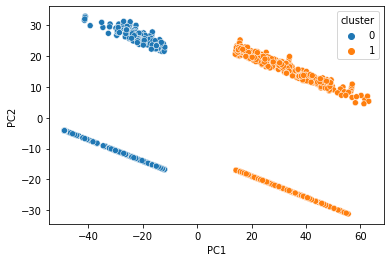

In [25]:

df_cluster = df.iloc[:,0:11]
df_cluster1, plot1 = kmeans(df_cluster, 2)

df_cluster1.head()

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,cluster,cen_x,cen_y,PC1,PC2
0,87,38.11,0,2,1,1,2,0,2,0,1,1,41.943819,0.041264,70.176460,14.555188
1,49,0.00,1,2,2,2,2,2,2,2,1,0,-38.633893,-0.038008,-17.032240,-23.803933
2,42,0.00,0,2,2,2,2,2,2,2,1,0,-38.633893,-0.038008,-24.450303,-21.254858
3,40,36.56,0,2,1,1,2,0,2,1,1,1,41.943819,0.041264,19.902714,29.571959
4,41,0.00,1,2,2,2,2,2,2,2,1,0,-38.633893,-0.038008,-25.514218,-20.883234


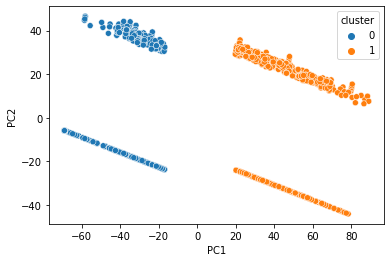

In [27]:
df_cluster_2 , plot2 = pca_kmeans(df_cluster, 2)
df_cluster_2.head()

In [28]:
# Visualization of clusters grouping

def cluster_grouping(df) :
    
    cluster_list = []
    n = df.cluster.unique()
    
    for i in n :
        cluster_list.append(df[df['cluster'] == i])
        
    return cluster_list

In [29]:
clusters = cluster_grouping(df_cluster1)
clusters[0]

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,cluster,cen_x,cen_y,PC1,PC2
0,87,38.11,0,2,1,1,2,0,2,0,1,1,41.943819,0.041264,70.176460,14.555188
3,40,36.56,0,2,1,1,2,0,2,1,1,1,41.943819,0.041264,19.902714,29.571959
7,80,38.17,1,2,0,1,2,0,2,0,1,1,41.943819,0.041264,62.779415,17.214404
8,66,38.61,0,2,1,1,2,0,2,0,1,1,41.943819,0.041264,48.052018,22.904508
10,73,36.22,1,2,0,0,2,0,2,0,1,1,41.943819,0.041264,54.817278,17.121507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,55,0.00,1,0,1,1,2,2,0,2,1,1,41.943819,0.041264,25.508025,-25.746485
1476,71,0.00,1,0,0,1,2,2,1,2,1,1,41.943819,0.041264,42.480179,-31.605140
1477,85,0.00,0,0,1,1,2,2,0,2,1,1,41.943819,0.041264,57.319110,-36.705644
1478,92,0.00,1,0,1,1,2,2,0,2,1,1,41.943819,0.041264,64.737173,-39.254719


In [30]:
clusters[1]

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,cluster,cen_x,cen_y,PC1,PC2
1,49,0.0,1,2,2,2,2,2,2,2,1,0,-38.633893,-0.038008,-17.032240,-23.803933
2,42,0.0,0,2,2,2,2,2,2,2,1,0,-38.633893,-0.038008,-24.450303,-21.254858
4,41,0.0,1,2,2,2,2,2,2,2,1,0,-38.633893,-0.038008,-25.514218,-20.883234
5,42,0.0,0,2,2,2,2,2,2,2,1,0,-38.633893,-0.038008,-24.450303,-21.254858
6,39,0.0,0,2,2,2,2,2,2,2,1,0,-38.633893,-0.038008,-27.631045,-20.159596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,19,0.0,2,2,2,2,2,2,2,2,1,0,-38.633893,-0.038008,-48.843325,-12.844774
1481,14,0.0,2,2,2,2,2,2,2,2,1,0,-38.633893,-0.038008,-54.144562,-11.019337
1482,22,0.0,2,2,2,2,2,2,2,2,1,0,-38.633893,-0.038008,-45.662584,-13.940036
1483,23,0.0,2,2,2,2,2,2,2,2,1,0,-38.633893,-0.038008,-44.602336,-14.305123
